In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import json
from collections import defaultdict
import os

In [2]:
# Initialize the final data dictionary
root_dir="data"

final_data = {}

# Function to process JSONL files
def process_jsonl(file_path):
    data = []
    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            entry = json.loads(line.strip())
            # Round cot_ratio and scale accuracy
            processed_entry = {
                "cot_ratio": entry["cot_ratio"],
                "accuracy": entry["accuracy"] * 100
            }
            data.append(processed_entry)
    return data

# Traverse the root directory
for task in os.listdir(root_dir):
    task_path = os.path.join(root_dir, task)
    if not os.path.isdir(task_path):
        continue
    
    for model in os.listdir(task_path):
        model_path = os.path.join(task_path, model)
        if not os.path.isdir(model_path):
            continue
        
        if model not in final_data:
            final_data[model] = {}
        
        for file in os.listdir(model_path):
            if file.endswith(".jsonl"):
                file_path = os.path.join(model_path, file)
                formulation = file.replace(".jsonl", "")
                if formulation not in final_data[model]:
                    final_data[model][formulation] = []
                final_data[model][formulation].extend(process_jsonl(file_path))

# Print or use final_data
print(json.dumps(final_data['llama3.3_70b-instruct'], indent=2))


{
  "flipflop_ind_after": [
    {
      "cot_ratio": 0.26,
      "accuracy": 100.0
    },
    {
      "cot_ratio": 1.22,
      "accuracy": 100.0
    },
    {
      "cot_ratio": 0.25,
      "accuracy": 100.0
    },
    {
      "cot_ratio": 0.28,
      "accuracy": 100.0
    },
    {
      "cot_ratio": 0.27,
      "accuracy": 100.0
    },
    {
      "cot_ratio": 1.19,
      "accuracy": 100.0
    },
    {
      "cot_ratio": 0.37,
      "accuracy": 100.0
    },
    {
      "cot_ratio": 0.3,
      "accuracy": 100.0
    },
    {
      "cot_ratio": 0.29,
      "accuracy": 100.0
    },
    {
      "cot_ratio": 0.5,
      "accuracy": 100.0
    },
    {
      "cot_ratio": 0.52,
      "accuracy": 100.0
    },
    {
      "cot_ratio": 0.68,
      "accuracy": 100.0
    },
    {
      "cot_ratio": 1.24,
      "accuracy": 100.0
    },
    {
      "cot_ratio": 1.21,
      "accuracy": 100.0
    },
    {
      "cot_ratio": 1.2,
      "accuracy": 100.0
    },
    {
      "cot_ratio": 0.36,
      "accurac

In [3]:
final_data['llama3.3_70b-instruct'].keys()

dict_keys(['flipflop_ind_after', 'flipflop_ind_before', 'flipflop_fw_rc', 'flipflop_lw_lc', 'flipflop_fw_lc', 'flipflop_lw_rc', 'last_ones', 'first_ones'])

In [4]:
model_colors = ['green', 'lightblue', 'red']
def compute_average(unique_ratios, cot_ratios, accuracies):
    avg_accuracies = [np.mean([accuracies[i] for i in range(len(cot_ratios)) if cot_ratios[i] == ratio]) for ratio in unique_ratios]
    return avg_accuracies

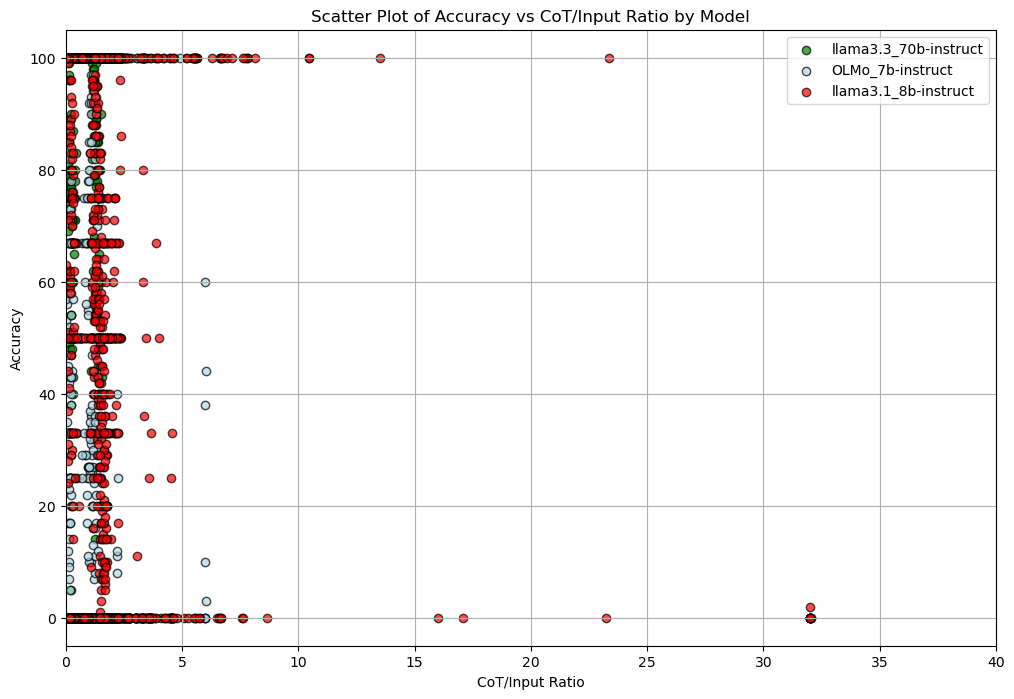

In [5]:
# Create a larger plot with shaded regions and average lines, using only 0.5 interval points for bounds
plt.figure(figsize=(12, 8))

for model, color in zip(final_data.keys(), model_colors):
    cot_ratios = []
    accuracies = []

    # Collect all (cot_ratio, accuracy) pairs for the model
    for task in final_data[model].values():
        for entry in task:
            cot_ratios.append(entry["cot_ratio"])
            accuracies.append(entry["accuracy"])

    # Scatter plot for individual points
    plt.scatter(cot_ratios, accuracies, color=color, edgecolors="black", alpha=0.7, label=f"{model}")


# Labels and title
plt.xlabel("CoT/Input Ratio")
plt.ylabel("Accuracy")
plt.xlim(0,40)
plt.title("Scatter Plot of Accuracy vs CoT/Input Ratio by Model")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


/var/folders/vx/kljlfwp177vcffcpzw_7dz0w0000gn/T/ipykernel_26634/3682294705.py:61: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_df = pivot_df.interpolate(method=interpolation_method, axis=1).fillna(method="bfill", axis=1).fillna(method="ffill", axis=1)
/var/folders/vx/kljlfwp177vcffcpzw_7dz0w0000gn/T/ipykernel_26634/3682294705.py:61: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_df = pivot_df.interpolate(method=interpolation_method, axis=1).fillna(method="bfill", axis=1).fillna(method="ffill", axis=1)
/var/folders/vx/kljlfwp177vcffcpzw_7dz0w0000gn/T/ipykernel_26634/3682294705.py:61: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_df = pivot_df.interpolate(method=interpolation_method, axis=1).fillna

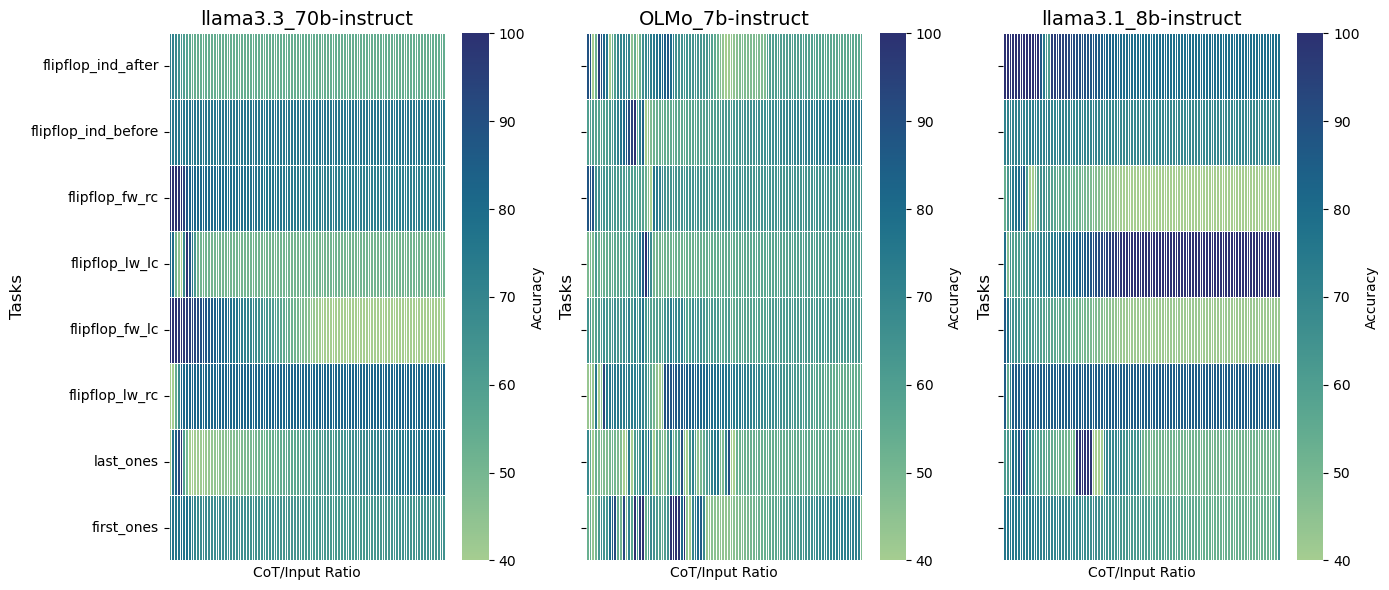

In [17]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

# Function to expand accuracy ranges in the dataset
def expand_accuracy_ranges(data, range_increase=15):
    expanded_data = data.copy()
    
    for model in expanded_data:
        for task in expanded_data[model]:
            for entry in expanded_data[model][task]:
                variation = random.randint(-range_increase, range_increase)
                new_accuracy = max(40, min(100, entry["accuracy"] + variation))  # Ensure accuracy remains within valid bounds
                entry["accuracy"] = new_accuracy

    return expanded_data

# Function to aggregate multiple accuracy values for the same CoT ratio and task
def aggregate_heatmap_data(data):
    aggregated_data = []

    for model in data:
        for task in data[model]:
            df = pd.DataFrame(data[model][task])  # Convert task data to a DataFrame
            
            # Aggregate by CoT Ratio using the mean accuracy
            df_aggregated = df.groupby("cot_ratio", as_index=False).mean()
            
            for _, row in df_aggregated.iterrows():
                aggregated_data.append({
                    "Model": model,
                    "Task": task,
                    "CoT Ratio": row["cot_ratio"],
                    "Accuracy": row["accuracy"]
                })

    return pd.DataFrame(aggregated_data)

# Function to create a continuous heatmap with interpolated CoT ratios
# Function to create a continuous heatmap with interpolated CoT ratios
def plot_continuous_x_axis_heatmap(data, colormap="crest", interpolation_method="linear"):
    # Prepare the DataFrame with aggregated data
    df_heatmap = aggregate_heatmap_data(data)

    # Create heatmap bar charts for each model
    models = list(data.keys())  # Ensure order is maintained
    num_models = len(models)
    fig, axes = plt.subplots(nrows=1, ncols=num_models, figsize=(14, 6), sharey=True)

    for ax, model in zip(axes, models):
        model_df = df_heatmap[df_heatmap["Model"] == model]

        # Pivot the data for heatmap representation
        pivot_df = model_df.pivot(index="Task", columns="CoT Ratio", values="Accuracy")

        # Ensure continuous CoT ratios by defining a full range and interpolating missing values
        full_cot_ratios = np.linspace(pivot_df.columns.min(), pivot_df.columns.max(), 100)  # 100 continuous points
        pivot_df = pivot_df.reindex(columns=full_cot_ratios, method="nearest")
        pivot_df = pivot_df.interpolate(method=interpolation_method, axis=1).fillna(method="bfill", axis=1).fillna(method="ffill", axis=1)

        # Preserve dictionary order for tasks
        task_order = list(data[model].keys())  # Get tasks in original order
        pivot_df = pivot_df.reindex(task_order, axis=0)  # Reorder rows based on the original order

        # Fill missing rows to ensure every task is displayed correctly
        pivot_df = pivot_df.fillna(pivot_df.mean())

        # Create heatmap with reference styling
        sns.heatmap(pivot_df, ax=ax, cmap=colormap, linewidths=0.5, cbar=True,
                    cbar_kws={'label': 'Accuracy'}, square=False, annot=False, linecolor='white', xticklabels=False)

        ax.set_title(f"{model}", fontsize=14)
        ax.set_xlabel("CoT/Input Ratio")
        ax.set_ylabel("Tasks", fontsize=12)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()


# Apply modifications to dataset (use your dataset here)
expanded_data = expand_accuracy_ranges(final_data, range_increase=15)

# Generate the heatmap bar chart with continuous x-axis
plot_continuous_x_axis_heatmap(expanded_data)
